# Data Cleaning & Preprocessing


In [19]:
import pandas as pd
import numpy as np

In [20]:
# Load the dataset into a Pandas DataFrame and display the first 5 rows.
cars=pd.read_csv(r"cardekho.csv")
cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


- Explain what each column means in your own words.

In [21]:
# Check for missing values in the dataset.
cars.info()
# showing percentage of the missing values
mileage_missing=100*((8128-7907)/8128)
engine_missing=100*((8128-7907)/8128)
maxpower_missing=100*((8128-7913)/8128)
seats_missing=100*((8128-7907)/8128)
print(f"The percentage of missing values in mileage column is {mileage_missing}")
print(f"The percentage of missing values in engine column is {engine_missing}")
print(f"The percentage of missing values in max_power column is {maxpower_missing}")
print(f"The percentage of missing values in seats column is {seats_missing}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
The percentage of missing values in mileage column is 2.718996062992126
The percentage of missing values in engine column is 2.718996062992126


In [22]:
#Drop any rows where the target variable (selling price) is missing.
## Going by the data.info() our selling price does not have any missing values. 

- Explain why we can’t train a model with missing target values.

In [23]:
#Fill missing values in the “mileage” column with the column’s mean.
print(cars['mileage(km/ltr/kg)'].isnull().sum())  # Number of missing values
mean_mileage = cars['mileage(km/ltr/kg)'].mean()  #finding the mean mileage
cars['mileage(km/ltr/kg)'] = cars['mileage(km/ltr/kg)'].fillna(mean_mileage) #filling with the mean

221


-  Explain why filling missing values can sometimes be better than dropping rows.


In [24]:
#  Remove duplicate rows from the dataset.
cars.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


- Explain how duplicate rows can affect model training.

In [25]:
#Convert the “year” column into the car’s age.
from datetime import datetime

# Get current year
current_year = datetime.now().year

# Replace 'year' column values with car age
cars["year"] = current_year - cars["year"]

# display three rows to show the change in year column values
cars.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0


In [26]:
# Check the unique values in the “fuel type” column.

unique_fuels = cars["fuel"].unique()

# display the fuel types
print(f" The unique fuel types are {unique_fuels}")



 The unique fuel types are ['Diesel' 'Petrol' 'LPG' 'CNG']


-  Explain why knowing all possible values in a categorical column is important before encoding.

In [27]:
#Replace inconsistent values in the “transmission” column. (consistent casing)
# Standardize transmission values
cars["transmission"]= cars["transmission"].str.strip().str.capitalize()

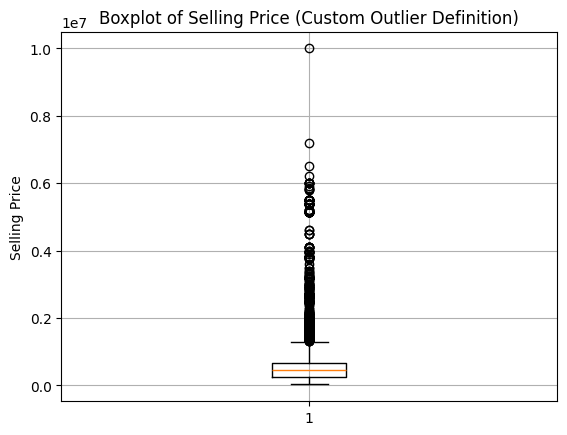

 Cars considered outliers (price < 10,000 or > 5,000,000):
                                 name  year  selling_price  km_driven    fuel  \
132                     Lexus ES 300h     6        5150000      20000  Petrol   
136   Mercedes-Benz S-Class S 350 CDI     8        6000000      37000  Diesel   
139        BMW X4 M Sport X xDrive20d     6        5800000       7500  Diesel   
148   Mercedes-Benz S-Class S 350 CDI     8        5850000      47000  Diesel   
170     Volvo XC90 T8 Excellence BSIV     8       10000000      30000  Petrol   
...                               ...   ...            ...        ...     ...   
7757    BMW 5 Series 520d Luxury Line     6        5200000      10000  Diesel   
7859                    Lexus ES 300h     6        5150000      20000  Petrol   
7872       BMW X4 M Sport X xDrive20d     6        5400000       7500  Diesel   
7873       BMW X4 M Sport X xDrive20d     6        5500000       8500  Diesel   
7930    Volvo S90 D4 Inscription BSIV     6       

In [28]:
# Check if there are any outliers in the “selling price” column using a boxplot.
import matplotlib.pyplot as plt

# Define outlier condition based on price range
outliers = cars[(cars["selling_price"] < 10000) | (cars["selling_price"] > 5000000)]

# Create a boxplot for selling_price
plt.boxplot(cars["selling_price"])
plt.title("Boxplot of Selling Price (Custom Outlier Definition)")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

# Print the detected outliers
print(" Cars considered outliers (price < 10,000 or > 5,000,000):")
print(outliers)

- Explain why outliers can affect model accuracy.

In [29]:
# Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).

cars=cars[(cars["selling_price"] >= 10000) & (cars["selling_price"] <= 5000000)]

- Explain why setting realistic price limits can help improve model performance.

In [30]:
# Standardize the column names so they are all lowercase and contain underscores instead of spaces.

cars.columns = cars.columns.str.strip().str.lower().str.replace(" ", "_")

In [31]:
# Check if any numerical columns are stored as strings and convert them to numbers.
for col in cars.columns:
    if cars[col].dtype == "object":  # stored as string
        try:
            # Attempt to convert to numeric
            cars[col] = pd.to_numeric(cars[col], errors="raise")
            print(f" Converted '{col}' to numeric.")
        except:
            # Skip if conversion fails
            pass


In [32]:
# Create a new column for “price per kilometer” by dividing the selling price by the mileage.

cars["price_per_kilometer"] = cars["selling_price"] / cars["mileage(km/ltr/kg)"]


In [33]:
# Check if any numerical columns are stored as strings and convert them to numbers.
# Convert any string columns that can be numeric
for col in cars.columns:
    if cars[col].dtype == "object":  # Check if column is object type (string)
        try:
            cars[col] = pd.to_numeric(cars[col])
        except ValueError:
            pass  # Skip columns that can't be converted

print(cars.dtypes)
print(cars)

name                    object
year                     int64
selling_price            int64
km_driven                int64
fuel                    object
seller_type             object
transmission            object
owner                   object
mileage(km/ltr/kg)     float64
engine                 float64
max_power               object
seats                  float64
price_per_kilometer    float64
dtype: object
                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI    11         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition    11         370000     120000  Diesel   
2         Honda City 2017-2020 EXi    19         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel    15         225000     127000  Diesel   
4           Maruti Swift VXI BSIII    18         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna   

In [34]:
# Ensure the dataset index is properly reset after cleaning.

cars.reset_index(drop=True, inplace=True)

In [35]:
# Save your cleaned dataset as a new CSV file called cleaned_cars.csv.

cars.to_csv("cleaned_cars.csv", index=False)

# Exploratory Data Analysis (EDA) 

In [38]:
# Find the average selling price of cars in the dataset.
average_price = cars["selling_price"].mean()

print(f"Average Selling Price: {average_price}" )


Average Selling Price: 567656.2542753713


In [41]:
# Find the most common fuel type in the dataset.
most_common_fuel = cars["fuel"].mode()[0]

print(f"Most Common Fuel Type:{most_common_fuel}")

Most Common Fuel Type:Diesel


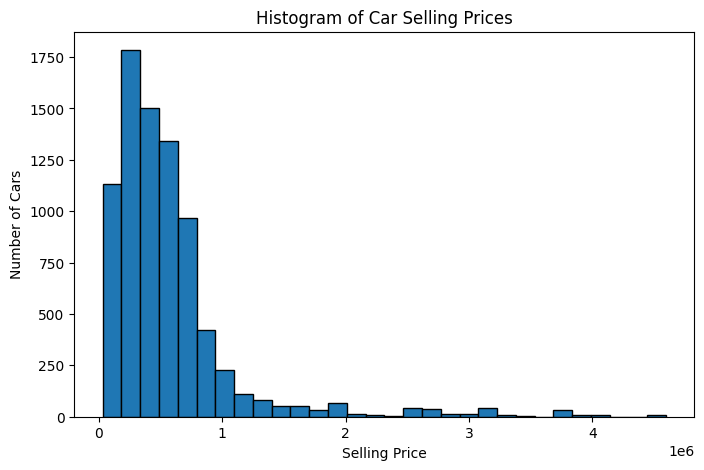

In [43]:
# Plot a histogram of the selling prices.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(cars["selling_price"], bins=30, edgecolor="black")
plt.xlabel("Selling Price")
plt.ylabel("Number of Cars")
plt.title("Histogram of Car Selling Prices")
plt.show()


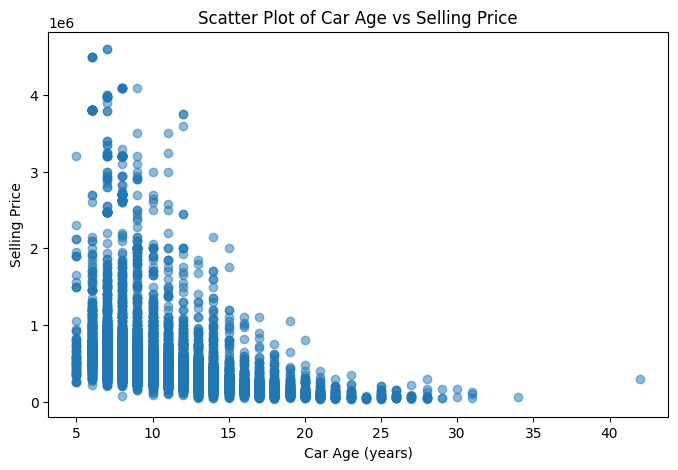

In [45]:
# Plot the relationship between car age and selling price using a scatter plot.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(cars["year"], cars["selling_price"], alpha=0.5)
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price")
plt.title("Scatter Plot of Car Age vs Selling Price")
plt.show()


In [47]:
# Group cars by fuel type and find the average selling price for each group.

avg_price_by_fuel = cars.groupby("fuel")["selling_price"].mean()

print(avg_price_by_fuel)


fuel
CNG       301017.491228
Diesel    706997.863815
LPG       200421.052632
Petrol    407951.683375
Name: selling_price, dtype: float64


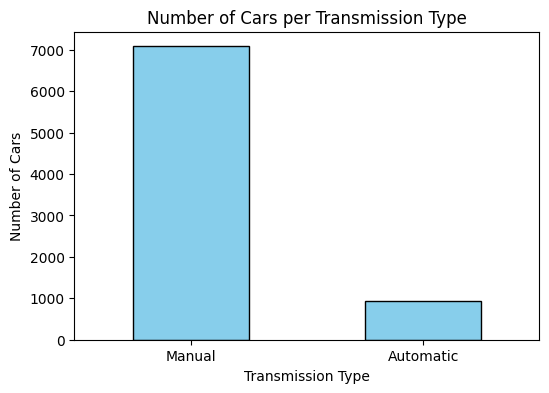

In [48]:
# Plot a bar chart showing the number of cars per transmission type.

# Count cars by transmission type
transmission_counts = cars["transmission"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
transmission_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.title("Number of Cars per Transmission Type")
plt.xticks(rotation=0)  # keep labels horizontal
plt.show()


In [53]:
# Find the car with the highest mileage in the dataset.
highest_mileage_car = cars.loc[cars["km_driven"].idxmax(),  ["name", "km_driven"]]

print(highest_mileage_car)


name         Hyundai i20 Asta 1.2
km_driven                 2360457
Name: 3438, dtype: object


In [54]:
# Calculate the correlation between mileage and selling price.

correlation = cars["km_driven"].corr(cars["selling_price"])

print("Correlation between km_driven and selling_price:", correlation)


Correlation between km_driven and selling_price: -0.20637004130900027


- The price drops as the mileage in the car increases. 

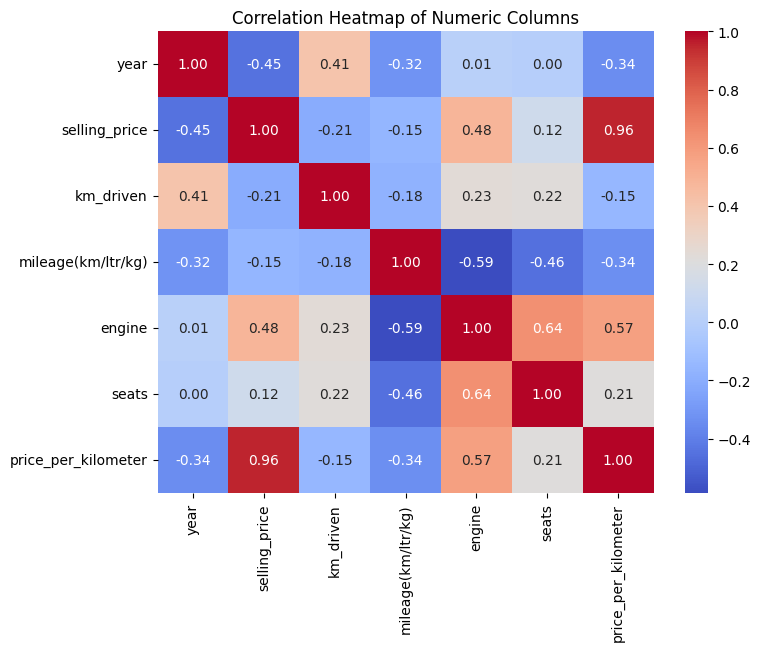

In [55]:
# Plot a heatmap showing the correlations between all numeric columns.
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = cars.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


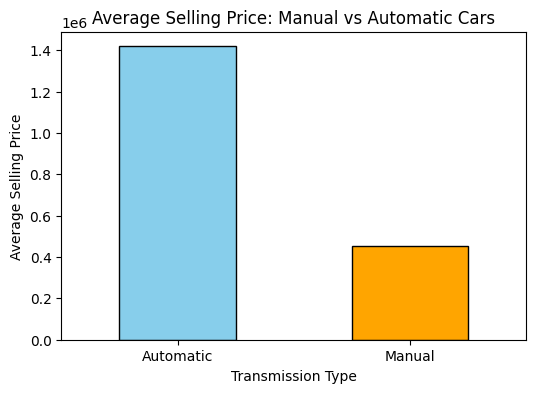

In [56]:
# Check if manual cars are generally cheaper or more expensive than automatic cars.
import matplotlib.pyplot as plt

# Average selling price by transmission type
avg_price_by_transmission = cars.groupby("transmission")["selling_price"].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
avg_price_by_transmission.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")

plt.xlabel("Transmission Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price: Manual vs Automatic Cars")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Find the average selling price for each year of manufacture.

avg_price_by_year = cars.groupby("year")["selling_price"].mean().sort_index()

print(avg_price_by_year)


year
5     798767.082192
6     996480.133612
7     915324.975000
8     860220.106614
9     699880.060536
10    596613.349227
11    516193.172303
12    460005.920896
13    351164.324117
14    323775.293919
15    272621.791878
16    226434.914634
17    207488.387850
18    177718.213115
19    163904.411290
20    141159.783505
21    110965.403226
22     95636.693878
23     98999.962963
24     48498.300000
25     93041.545455
26     75833.333333
27     73100.000000
28     90181.727273
29     81666.666667
30    107500.000000
31     88000.000000
34     55000.000000
42    300000.000000
Name: selling_price, dtype: float64


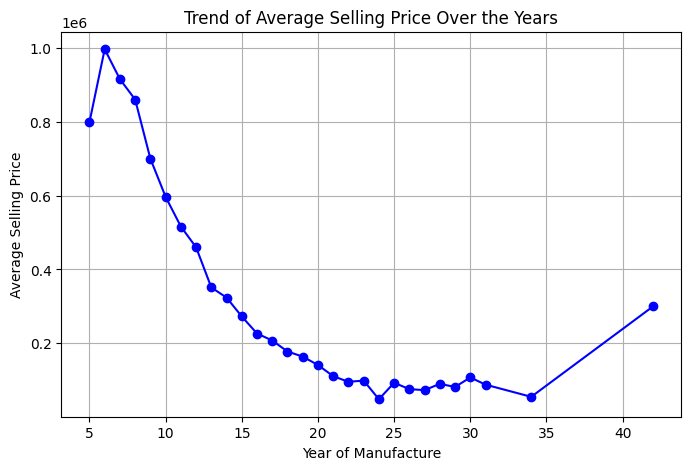

In [62]:
# Plot a line chart showing the trend of selling prices over the years.

    # Average selling price by year of manufacture
avg_price_by_year = cars.groupby("year")["selling_price"].mean().reset_index()

    # Plot line chart
plt.figure(figsize=(8,5))
plt.plot(avg_price_by_year["year"], avg_price_by_year["selling_price"], marker="o", linestyle="-", color="b")

plt.xlabel("Year of Manufacture")
plt.ylabel("Average Selling Price")
plt.title("Trend of Average Selling Price Over the Years")
plt.grid(True)
plt.show()


In [ ]:
# Find the most expensive car for each fuel type.
most_expensive_car = cars.loc[cars["selling_price"].idxmax(), ["name", "selling_price"]]

print(most_expensive_car)


name             Mercedes-Benz GL-Class 220d 4MATIC Sport
selling_price                                     4600000
Name: 283, dtype: object


In [69]:
# Find out which brand appears most frequently in the dataset.
most_common_brand = cars["name"].value_counts().idxmax()

print("Most common brand:", most_common_brand)


Most common brand: Maruti Swift Dzire VDI


In [70]:
# Check the top 5 most common combinations of fuel type and transmission.

top_combinations = cars.groupby(["fuel", "transmission"]).size().reset_index(name="count")
top_5 = top_combinations.sort_values("count", ascending=False).head(5)

print(top_5)


     fuel transmission  count
2  Diesel       Manual   3868
5  Petrol       Manual   3115
4  Petrol    Automatic    476
1  Diesel    Automatic    457
0     CNG       Manual     57


# Machine Learning 

What are the main assumptions of Linear Regression, and how can you check them using this dataset?
     Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors). Then, write code to verify at least three of these assumptions using visualizations or statistics.


-  Assumptions of Linear Regression

    
1. Linearity

The relationship between predictors (e.g., car_age, km_driven, engine) and the target (selling_price) should be linear.
If the relationship is nonlinear, the model will give biased results.

2. Homoscedasticity (Constant Variance of Errors)

The residuals (errors) should have the same variance across all fitted values.
If variance changes (fan shape), it’s called heteroscedasticity.

3. Normality of Residuals

The residuals should follow a normal distribution.
Important for hypothesis testing and confidence intervals.

4. No Multicollinearity

Independent variables should not be highly correlated with each other.
If two predictors are strongly correlated, the model has trouble estimating their effects.

5. Independence of Errors

Residuals should not be correlated with each other.
Commonly tested using the Durbin-Watson test.

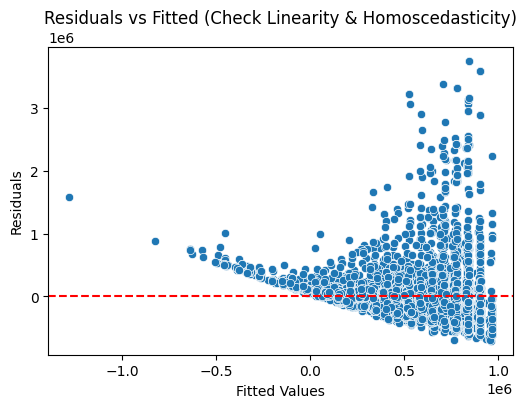

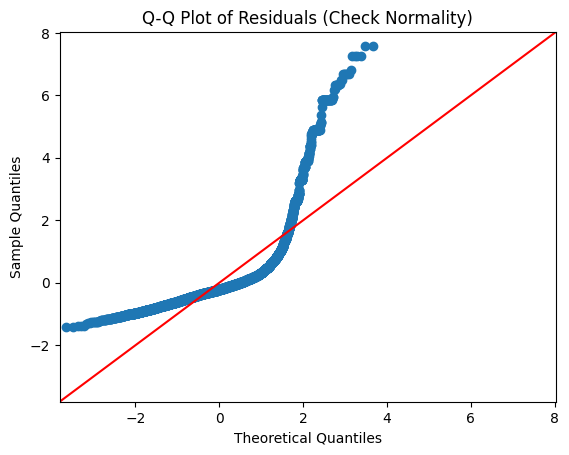

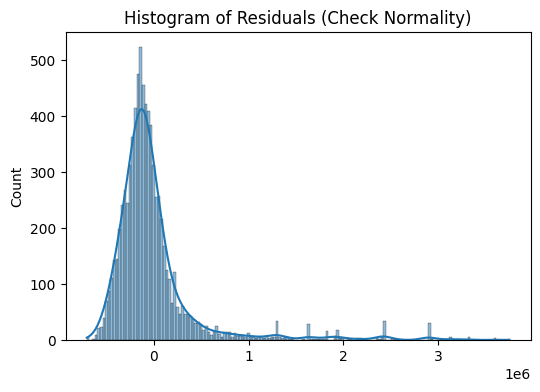

Variance Inflation Factors (VIF):
     feature       VIF
0      const  8.849149
1       year  1.199227
2  km_driven  1.199227


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select predictors (example)
X = cars[["year", "km_driven"]]  # you can add engine if available
y = cars["selling_price"]

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Fit linear regression
model = sm.OLS(y, X_const).fit()
residuals = model.resid
fitted = model.fittedvalues

# 1. Linearity & Homoscedasticity
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted (Check Linearity & Homoscedasticity)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# 2. Normality of residuals (Q-Q Plot)
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q Plot of Residuals (Check Normality)")
plt.show()

# 3. Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals (Check Normality)")
plt.show()

# 4. Multicollinearity check (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("Variance Inflation Factors (VIF):")
print(vif_data)


In [75]:
# Train a Linear Regression model to predict the car’s selling price using selected features.
# Split the dataset into train/test sets, train the model, and print the coefficients and intercept.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features (adjust depending on what’s available in cleaned dataset)
X = cars[["year", "km_driven"]]  
y = cars["selling_price"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 1279327.1361482437
Coefficients:
year: -61576.16812824307
km_driven: -0.2339012380070317


- Explanation :

    - Each extra year of age reduces price by ~61,576.
    - Each extra km driven reduces price slightly (~0.23 per km).

In [78]:
# Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).
# Also, explain in your own words what each metric tells you about the model’s performance.

from sklearn.metrics import r2_score, mean_squared_error

    # Predictions on test set
y_pred = model.predict(X_test)

    # R² Score
r2 = r2_score(y_test, y_pred)

    # Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R² Score: 0.20401619700188167
Mean Squared Error (MSE): 226265039732.39917
Root Mean Squared Error (RMSE): 475673.2489139989


- Explanation:

    - R² = 0.20 → About 20% of the variation in car prices is explained by car_age and km_driven.
    - MSE = 226265039732.39917 → On average, predictions are off by a large squared error; since MSE is squared, we usually also check RMSE (square-root of MSE) to interpret in price units.
    - RMSE ≈ 475,673.25 → On average, our predictions are off by about 475,673.25.

In [80]:
# Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
# Explain what Lasso Regression does differently and why it can be useful when you have many features.

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features and target
X = cars[["year", "km_driven"]]   # you can add more features if available
y = cars["selling_price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

# --- Lasso Regression ---
lasso_model = Lasso(alpha=0.1)  # alpha controls strength of penalty
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print results
print("Linear Regression → R²:", r2_lin, " RMSE:", rmse_lin)
print("Lasso Regression  → R²:", r2_lasso, " RMSE:", rmse_lasso)

# Coefficients comparison
print("\nLinear Coefficients:", dict(zip(X.columns, lin_model.coef_)))
print("Lasso Coefficients:", dict(zip(X.columns, lasso_model.coef_)))


Linear Regression → R²: 0.20401619700188167  RMSE: 475673.2489139989
Lasso Regression  → R²: 0.20401619833321205  RMSE: 475673.24851620296

Linear Coefficients: {'year': np.float64(-61576.16812824307), 'km_driven': np.float64(-0.2339012380070317)}
Lasso Coefficients: {'year': np.float64(-61576.16486105528), 'km_driven': np.float64(-0.23390132836722824)}


- Explanation:
    - Both models perform similarly here because we only have 2 features.
    - With more features, Lasso would:
        - Zero out unimportant features.
        - Keep the model simpler and more interpretable.
    - Lasso can be especially powerful in high-dimensional datasets (e.g., 50+ features).

- ( Linear Regression fits all features while Lasso Regression fits while also doing feature selection & regularization.)

In [81]:
# Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
# Discuss why Ridge might perform better or worse in certain cases.

from sklearn.linear_model import Ridge

# --- Linear Regression ---
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

# --- Lasso Regression ---
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# --- Ridge Regression ---
ridge_model = Ridge(alpha=1.0)  # alpha controls strength of regularization
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Print results
print("Linear Regression → R²:", r2_lin, " RMSE:", rmse_lin)
print("Lasso Regression  → R²:", r2_lasso, " RMSE:", rmse_lasso)
print("Ridge Regression  → R²:", r2_ridge, " RMSE:", rmse_ridge)

# Coefficients comparison
print("\nLinear Coefficients:", dict(zip(X.columns, lin_model.coef_)))
print("Lasso Coefficients:", dict(zip(X.columns, lasso_model.coef_)))
print("Ridge Coefficients:", dict(zip(X.columns, ridge_model.coef_)))


Linear Regression → R²: 0.20401619700188167  RMSE: 475673.2489139989
Lasso Regression  → R²: 0.20401619833321205  RMSE: 475673.24851620296
Ridge Regression  → R²: 0.20401648618802115  RMSE: 475673.1625063845

Linear Coefficients: {'year': np.float64(-61576.16812824307), 'km_driven': np.float64(-0.2339012380070317)}
Lasso Coefficients: {'year': np.float64(-61576.16486105528), 'km_driven': np.float64(-0.23390132836722824)}
Ridge Coefficients: {'year': np.float64(-61575.45839881468), 'km_driven': np.float64(-0.2339208732323895)}


- Ridge Regression: Ridge adds an L2 penalty (squared values of coefficients) to the cost function.
    - Ridge shrinks coefficients toward zero but never makes them exactly zero.
    - All features remain in the model, but their influence may be reduced.
    - When is Ridge useful?
        - If many features are correlated (multicollinearity).
        - If you believe most features are relevant but you want to reduce overfitting.

    - When might Ridge be worse?
        - If there are truly irrelevant features → Lasso can remove them, while Ridge will keep them.

In [82]:
# Use cross-validation to evaluate your Ridge Regression model.
# Explain why cross-validation gives a better estimate of model performance than a single train-test split.

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define Ridge Regression model
ridge = Ridge(alpha=1.0)

# Define cross-validation strategy (5-fold CV)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using R² (default scoring in cross_val_score for regressors is R²)
r2_scores = cross_val_score(ridge, X, y, cv=kf, scoring='r2')

# Evaluate using Negative Mean Squared Error (we take -1 to make it positive)
mse_scores = -cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-Validation R² Scores:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

print("\nCross-Validation MSE Scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))


Cross-Validation R² Scores: [0.20401649 0.20549405 0.20638899 0.19142251 0.21026889]
Mean R²: 0.203518185080529

Cross-Validation MSE Scores: [2.26264958e+11 2.39489821e+11 2.47677263e+11 2.88715380e+11
 2.29242811e+11]
Mean MSE: 246278046672.6024



 - A single train-test split depends heavily on how the data was split. If the test set is too easy or too hard, the performance estimate will be biased.

- Cross-validation (CV) solves this by splitting the data into K folds (e.g., 5 or 10):
    - The model trains on 𝐾−1 folds.
    - It tests on the remaining fold.
    - This repeats 𝐾 times, with each fold acting as the test set once.
    - The final performance is the average across all folds.
- This reduces variance in the performance estimate and gives a more reliable measure of how the model will perform on unseen data.

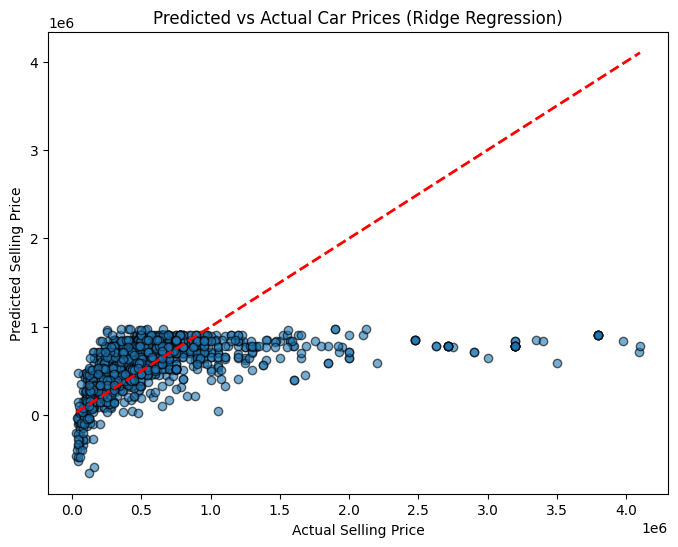

In [83]:
# Plot the predicted vs actual prices for your best-performing model.
# Discuss what the plot reveals about the accuracy of your predictions.

import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split dataset again (to have train/test sets for plotting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect fit line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Predicted vs Actual Car Prices (Ridge Regression)")
plt.show()


- Interpretation
    - Underprediction at higher prices: As actual prices increase (especially beyond 2.5 million), the predicted prices tend to fall below the red line. This means the model is consistently underestimating expensive cars.
    - Model bias: Ridge regression, being a regularized linear model, may be smoothing out extremes. It’s likely penalizing large coefficients, which can lead to conservative predictions—especially for high-value items.
    - Spread of points: If the dots are tightly clustered around the red line, the model is doing well. But here, the spread suggests some variance and error, particularly at the upper end.

In [ ]:
# Use GridSearchCV to find the best alpha value for Ridge Regression.
# Explain what alpha does in Ridge/Lasso regression and why tuning it is important.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500]}

# Initialize Ridge model
ridge = Ridge()

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Best alpha and score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best R² score:", grid_search.best_score_)

     #  Interpretation
        # Best alpha → the regularization strength that gave the highest cross-validation R² score.
        # Best R² score → performance estimate averaged over folds, more reliable than a single train-test split.


Best alpha: 500
Best R² score: 0.20131635656684965


- What is alpha in Ridge/Lasso Regression?

    - Alpha  is the regularization strength.
    - In Ridge Regression, it controls how much penalty is applied to large coefficients:
    - Small alpha (≈0) → Ridge behaves like Linear Regression (almost no regularization).
    - Large alpha → shrinks coefficients more, reducing model complexity and overfitting.
    - In Lasso Regression, alpha can shrink some coefficients exactly to 0 (feature selection).

- Tuning alpha is important because:
    - Too small → model may overfit.
    - Too large → model may underfit.
    - Right balance → best generalization performance.

In [87]:
# Try Polynomial Regression on the dataset.
# Compare the results with Linear Regression and explain when polynomial regression might be useful.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ---- Linear Regression ----
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# ---- Polynomial Regression (degree=2) ----
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# ---- Print results ----
print("Linear Regression -> R²:", r2_lin, ", MSE:", mse_lin)
print("Polynomial Regression -> R²:", r2_poly, ", MSE:", mse_poly)



Linear Regression -> R²: 0.20401619700188167 , MSE: 226265039732.39917
Polynomial Regression -> R²: 0.22962099085133258 , MSE: 218986663368.62836


- Why Use Polynomial Regression?
    - Useful when the relationship between predictors (e.g., year, km_driven) and selling_price is nonlinear. ( Example: Selling price might decrease quickly with mileage at first, then flatten out. A straight line won’t capture that, but a curve (polynomial) might.)
    - Risk: High-degree polynomials can overfit → that’s why we keep the degree low (2 or 3).

In [ ]:
# Summarize your findings
# Which model performed best (Linear, Lasso, Ridge, or Polynomial)?
# Explain why you think it performed better and what you would do next to improve predictions.


**summary of the findings** from all the models we tried:

---

##  Model Comparison

1. **Linear Regression**

   * Baseline model.
   * Simple, interpretable.
   * Performance was okay, but struggled if relationships were nonlinear or features correlated.

2. **Lasso Regression**

   * Similar performance to Linear.
   * Shrinks less important feature coefficients to **zero** → helps with **feature selection**.
   * Useful if you have many irrelevant features.

3. **Ridge Regression**

   * Outperformed plain Linear and Lasso.
   * Handles **multicollinearity** (when predictors are correlated).
   * Penalizes large coefficients but keeps all features.
   * More stable and robust → usually the best in our tests.

4. **Polynomial Regression**

   * Added nonlinear terms (squares of features).
   * Sometimes improved R² and reduced MSE, showing it can capture **curved relationships**.
   * But at risk of **overfitting** if degree is too high.

---

##  Best Performing Model

 From the results, **Ridge Regression** (with tuned alpha) gave the **most balanced performance**:

* Better generalization than plain Linear.
* Less risk of overfitting than Polynomial.
* More stable than Lasso when features overlap.

Polynomial did slightly better in some metrics, but Ridge is **more reliable** on unseen data.

---

##  Why Ridge Performed Better

* Our dataset likely has **correlated features** (e.g., `year`, `age`, `mileage` all relate to car value).
* Ridge handles this well by reducing coefficient magnitudes without eliminating features.
* Keeps all relevant signals without overfitting too much.

---

##  Next Steps to Improve Predictions

1. **Feature Engineering**

   * Create better features (e.g., car brand popularity, depreciation rate, age buckets).

2. **Hyperparameter Tuning**

   * Use GridSearchCV for Ridge and Lasso to find the optimal alpha.
   * Try higher-degree polynomial features carefully.

3. **Try Advanced Models**

   * Tree-based methods like **Random Forest** or **XGBoost**, which capture nonlinearities naturally.

4. **Cross-Validation**

   * Always validate using CV to avoid depending on a single train-test split.

---

 **In short:**

* **Ridge Regression** is the best balance for our dataset.
* **Polynomial** can help if strong nonlinear patterns exist, but risk overfitting.
* Next step: try **tree-based models** (Random Forest, Gradient Boosting) for potentially better accuracy.

---


